# 0. 시작하기 전에

### 구글 드라이브 연동

In [721]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 기본 경로 설정

In [722]:
import os
os.chdir('/content/drive/MyDrive/프로젝트/캐글/타이타닉/')

In [723]:
!pwd

/content/drive/MyDrive/프로젝트/캐글/타이타닉


### 패키지 임포트

In [724]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

### 전체 컬럼, 로우 다 보이게 설정

In [725]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. 탐색적 데이터 분석


### 데이터 불러오기

In [726]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv("gender_submission.csv")

### 각 데이터 확인

In [727]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [728]:
train.shape

(891, 12)

In [729]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [730]:
test.shape

(418, 11)

In [731]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [732]:
submission.shape

(418, 2)

### 피처 알아보기



1. PassengerId: 탑승객 번호
2. Survived: 생존여부 (생존 1, 사망 0)
3. Pclass: 객실 등급
4. Name: 승객 이름
5. Sex: 성별
6. Age: 나이
7. SibSp: 배우자 동행 여부
8. Parch: 부모와 함께 탑승한 어린이 수
9. Ticket: 티켓 번호
10. Fare: 티켓 구매 비용
11. Cabin: 객실 이름
12. Embarked: 탑승한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)



### 칼럼 정보 확인

In [733]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 칼럼 통계치 확인

In [734]:
round(train.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### 결측값 개수 확인

In [735]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결측값이 아닌 빈 문자열이 있는지 확인

In [736]:
def is_emptystring(x):
    return x.eq('').any()

train.apply(lambda x : is_emptystring(x))

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

### 데이터 시각화

In [737]:
Sex_df = train[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived']).count().unstack()
Pclass_df = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().unstack()
Embarked_df = train[['Embarked', 'Survived', 'PassengerId']].groupby(['Embarked', 'Survived']).count().unstack()
Age_df = [train.Age[train.Survived == 0], train.Age[train.Survived == 1]]

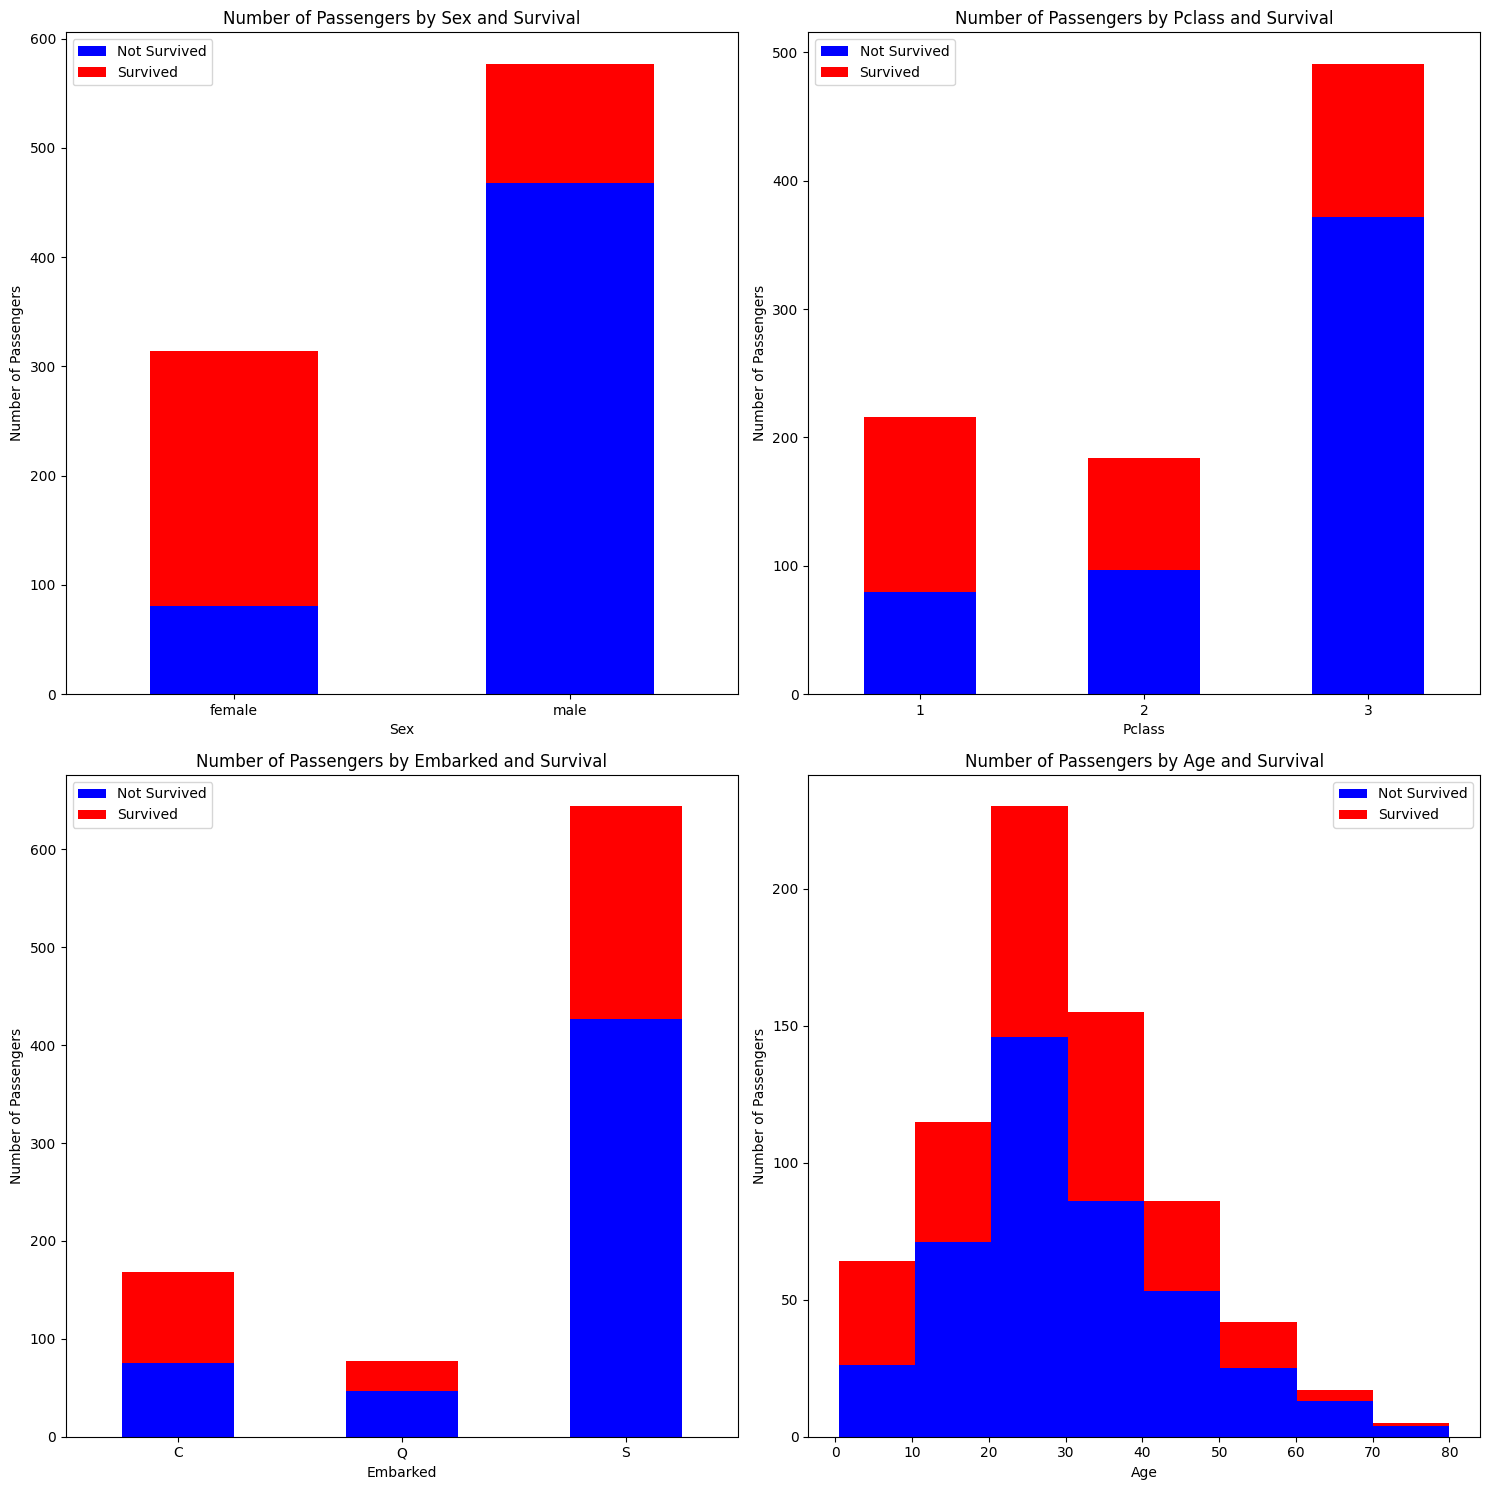

In [738]:
def plot_bar(ax, df, title, xlabel, ylabel, xticks_rotation=0, colors=['blue', 'red']):
    df.plot.bar(stacked=True, ax=ax, color=colors)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(['Not Survived', 'Survived'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=xticks_rotation)

# 그리드 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 15), squeeze=False)  # 3행, 2열의 그리드 생성

# 첫 번째 그래프: 성별에 따른 생존자 수
plot_bar(axs[0, 0], Sex_df, 'Number of Passengers by Sex and Survival', 'Sex', 'Number of Passengers')

# 두 번째 그래프: 객실 등급에 따른 생존자 수
plot_bar(axs[0, 1], Pclass_df, 'Number of Passengers by Pclass and Survival', 'Pclass', 'Number of Passengers')

# 세 번째 그래프: 탑승 항구에 따른 생존자 수
plot_bar(axs[1, 0], Embarked_df, 'Number of Passengers by Embarked and Survival', 'Embarked', 'Number of Passengers')

# 네 번째 그래프: 연령별 생존자 수
axs[1, 1].hist(Age_df, bins=8, stacked=True, color=['blue', 'red'])
axs[1, 1].set_title('Number of Passengers by Age and Survival')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Number of Passengers')
axs[1, 1].legend(['Not Survived', 'Survived'])

plt.tight_layout()  # 그래프 간의 적절한 간격 자동 조정
plt.show()

레이블 인코딩

In [739]:
from sklearn.preprocessing import LabelEncoder

# 각 컬럼에 대해 반복하면서 LabelEncoder 적용
for column in train:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])

### 피처 상관성 시각화

<Axes: >

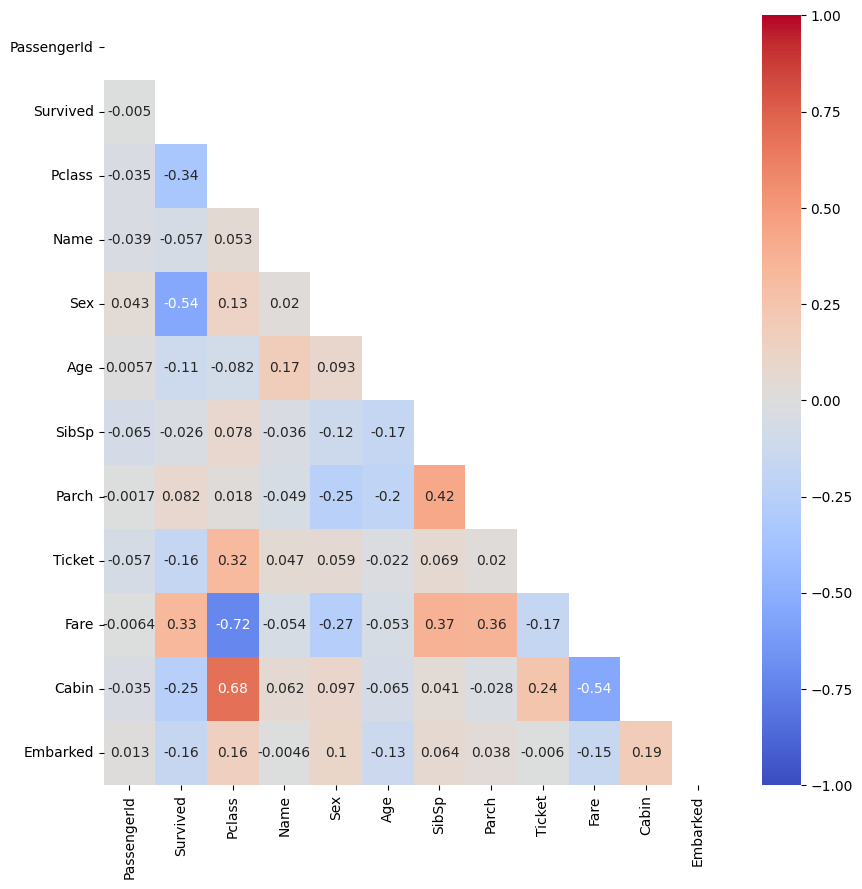

In [740]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(10,10))

sns.heatmap(train.corr(),
             mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

# 2. 데이터 전처리


### 결측치 처리

In [741]:
# # Age 결측치 평균값으로 메우기
train['Age'] = train['Age'].fillna(train['Age'].mean())

train = train.drop(columns=['Cabin'])

# Embarked 결측치 가장많은 비중을 차지하는 S로 메우기
train['Embarked'] = train['Embarked'].fillna('S')

결측치 처리 후 상관성 분석

<Axes: >

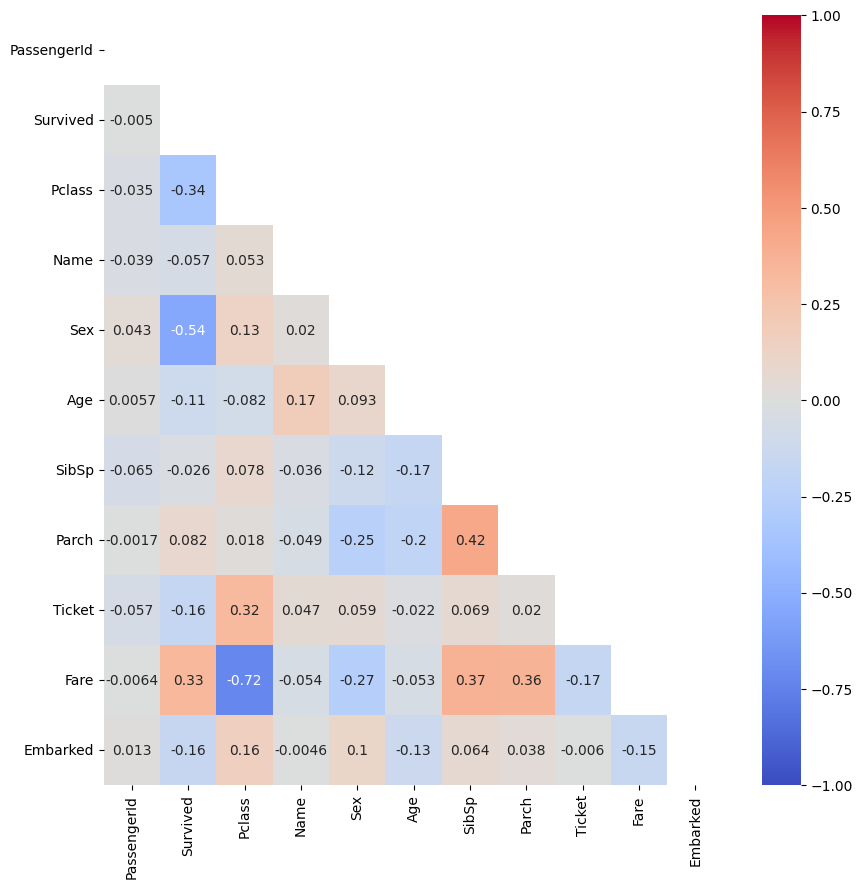

In [742]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(10,10))

sns.heatmap(train.corr(),
             mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

필요없는 피처 제거

In [743]:
train = train.drop(columns=['Name', 'Ticket', 'Embarked', 'SibSp', 'Parch','Age'])

데이터셋 나누기

In [744]:
from sklearn.model_selection import train_test_split    # 데이터셋 나누는 라이브러리

X = train.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장하고 싶을 때
y = train['Survived'] # 종속변수

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)

데이터 스케일링

In [745]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

데이터 오버샘플링

In [746]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=2, random_state=0)

oversample = SMOTE()

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


X_train =X_train_over
y_train =y_train_over

# 3. 데이터 모델링

### 하이퍼 파라미터 정의

In [747]:
!pip install scikit-optimize
!pip install catboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

In [748]:
search_spaces = {
    '랜덤포레스트 분류': { 'model': RandomForestClassifier(),
                            'params': {'n_estimators': Integer(100, 500),
                            'max_depth': Integer(1, 50),
                            'min_samples_split': Real(0.01, 0.1)}},

    '로지스틱회귀 분류': {'model': LogisticRegression(),
                            'params': {'C': Real(1e-6, 1e+6, prior='log-uniform')}},

    'XGBoost': {'model': xgb.XGBClassifier(),
                'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'n_estimators': Integer(50, 300),
                            'max_depth': Integer(1, 50),
                            'min_child_weight': Integer(1, 10),
                            'subsample': Real(0.5, 1.0),
                            'colsample_bytree': Real(0.5, 1.0)}},

    'LightGBM': {'model': lgb.LGBMClassifier(verbose=-1),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'n_estimators': Integer(50, 300),
                            'max_depth': Integer(1, 50),
                            'num_leaves': Integer(2, 128),
                            'min_child_samples': Integer(1, 100),
                            'subsample': Real(0.5, 1.0),
                            'colsample_bytree': Real(0.5, 1.0),
                            'objective': Categorical(['binary']),
                            'is_unbalance': Categorical([True, False]),
                            'reg_alpha': Real(0.0, 1.0),
                            'reg_lambda': Real(0.0, 1.0),
                            'max_bin': Integer(200, 300),
                            'min_split_gain': Real(0.0, 0.1),
                            'subsample_freq': Integer(1, 10),
                            'feature_fraction': Real(0.5, 1.0)}},

    'CATboost': {'model': CatBoostClassifier(verbose=False),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'depth': Integer(4, 10),
                            'l2_leaf_reg': Real(1, 10),
                            'iterations': Integer(100, 1000),
                            'border_count': Integer(32, 255)}},

        'svc': {'model': SVC(),
            'params': {'C': Real(1e-6, 1e+6, prior='log-uniform'),
                        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
                        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid'])}}
}

In [749]:
best_models = {}

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, config in search_spaces.items():
    optimizer = BayesSearchCV(
        estimator=config['model'],
        search_spaces=config['params'],
        n_iter=20,
        cv=stratified_k_fold,
        n_jobs=-1,
        scoring='accuracy'
    )
    optimizer.fit(X, y)

    best_models[model_name] = optimizer.best_estimator_

    print(f'{model_name}')
    print(f'최적 파라미터: {optimizer.best_params_}')
    print(f'점수: {optimizer.best_score_}')

LightGBM
최적 파라미터: OrderedDict([('colsample_bytree', 0.9478035148718638), ('feature_fraction', 0.9939732626227341), ('is_unbalance', False), ('learning_rate', 0.021913991594702815), ('max_bin', 237), ('max_depth', 14), ('min_child_samples', 3), ('min_split_gain', 0.09487632325388512), ('n_estimators', 94), ('num_leaves', 122), ('objective', 'binary'), ('reg_alpha', 0.5729379348747674), ('reg_lambda', 0.7089354424863308), ('subsample', 0.7698183331097158), ('subsample_freq', 5)])
점수: 0.8204004770573097


### 모델 학습

In [750]:
best_params = optimizer.best_params_
model = lgb.LGBMClassifier(**best_params, verbose=-1)


model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.9478035148718638,
               feature_fraction=0.9939732626227341, is_unbalance=False,
               learning_rate=0.021913991594702815, max_bin=237, max_depth=14,
               min_child_samples=3, min_split_gain=0.09487632325388512,
               n_estimators=94, num_leaves=122, objective='binary',
               reg_alpha=0.5729379348747674, reg_lambda=0.7089354424863308,
               subsample=0.7698183331097158, subsample_freq=5, verbose=-1)

### 모델 예측

In [751]:
 preds = model.predict(X_val)

# 4. 모델 평가

[[47  7]
 [13 23]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        54
           1       0.77      0.64      0.70        36

    accuracy                           0.78        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.78      0.78      0.77        90



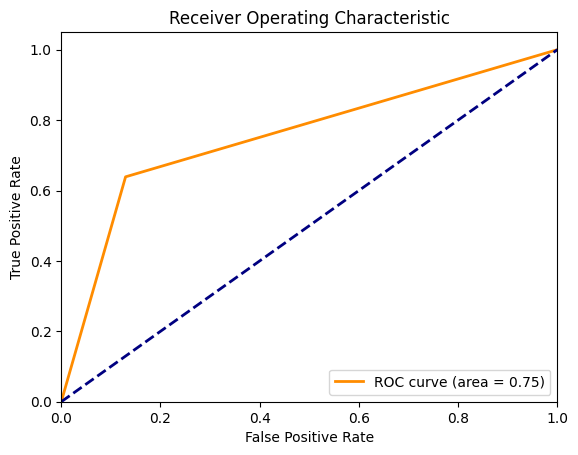

In [752]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 혼동행렬과 분류 보고서 출력
print(confusion_matrix(y_val, preds))
print(classification_report(y_val, preds))

# ROC 커브와 AUC 계산
fpr, tpr, thresholds = roc_curve(y_val, preds)  # preds_proba는 모델이 예측한 확률입니다. 이진 분류에서는 양성 클래스에 대한 확률을 사용해야 합니다.
roc_auc = roc_auc_score(y_val, preds)  # ROC AUC 점수 계산

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 5. 최종 예측

### 테스트 파일 로드 및 전처리

In [753]:
# 각 컬럼에 대해 반복하면서 LabelEncoder 적용
for column in test:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])

test['Age'] = test['Age'].fillna(test['Age'].mean())

test = test.drop(columns=['Cabin'])

test['Embarked'] = test['Embarked'].fillna('S')

test = test.drop(columns=['Name', 'Ticket', 'Embarked', 'SibSp', 'Parch','Age'])

rb_scaler = RobustScaler()

test_scaled = rb_scaler.fit_transform(test)  # 이렇게 하면 test의 모든 컬럼을 스케일링합니다.

test = pd.DataFrame(test_scaled, columns=test.columns)

### 모델 추론

In [754]:
preds = model.predict(test)

### 제출 파일 만들기

In [755]:
submission["Survived"] = preds
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [756]:
submission.to_csv("/content/drive/MyDrive/프로젝트/캐글/타이타닉/submission.csv", index=False)